In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv("Datains - Marcella - Price Monitoring TP-Link_TP-Link Price Monitoring_Table.csv")

df.head()

C:\Users\Rizal\AppData\Local\Temp\ipykernel_18288\772601970.py:1: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Datains - Marcella - Price Monitoring TP-Link_TP-Link Price Monitoring_Table.csv")


,Date,Last Crawling,SKU Name,Product Name,Url Product,Seller,Merchant,Stock,Item Condition,Filter,Flag,Bottom Price,Original Price,Discount,Selling Price,Discrepancy,Sales Quantity,Sales Revenue
0,"Oct 22, 2022","Oct 22, 2022",TL WR840N,TP-Link TL-WR840N 2 Antenna 300Mbps Wireless N...,https://tokopedia.com/ccplace/tp-link-tl-wr840...,ccplace shop,tokopedia,In Stock,baru,Above,Please Check,155000,231000,0,231000,0.014903,0,0
1,"Oct 22, 2022","Oct 22, 2022",TL WR840N,Promo TP-LINK TL-WR840N Wireless Router 300Mbp...,https://tokopedia.com/gilsaashopp/promo-tp-lin...,gilsaa_shopp,tokopedia,In Stock,baru,Above,Please Check,155000,218800,0,218800,0.014116,0,0
2,"Oct 22, 2022","Oct 22, 2022",TL WR840N,Tp-Link TL-WR840N 300Mbps Wireless N Speed Rou...,https://tokopedia.com/ccwinta/tp-link-tl-wr840...,ccwinta shop,tokopedia,In Stock,baru,Above,Please Check,155000,227000,0,227000,0.014645,0,0
3,"Oct 22, 2022","Oct 22, 2022",TL WR840N,JARINGAN TP-LINK TL-WR 840N TL-WR840N 300MBps ...,https://tokopedia.com/belsa/jaringan-tp-link-t...,BELSA_SHOP,tokopedia,In Stock,baru,Above,Please Check,155000,263000,0,263000,0.016968,0,0
4,"Oct 22, 2022","Oct 22, 2022",TL WR840N,TPLink TL-WR840N Router Wireless WiFi 300Mbps ...,https://tokopedia.com/ccwinta/tplink-tl-wr840n...,ccwinta shop,tokopedia,In Stock,baru,Above,Please Check,155000,236000,0,236000,0.015226,0,0


In [3]:
df["Discount"].value_counts().sort_values(ascending=False)
# df["Original Price"] == df["Selling Price"]

Discount
0       32642
0.02       26
0.2         8
0.05        8
0.1         8
0.03        7
0.09        6
0.07        4
0.08        4
0.11        4
0.35        4
0           4
0.01        3
0.06        3
0.62        3
0.16        3
0.23        3
0.29        3
0.13        2
0.63        2
-           2
0.24        2
0.53        2
0.15        2
0.54        2
0.5         1
0.6         1
0.18        1
0.48        1
0.32        1
0.83        1
0.4         1
0.36        1
0.12        1
0.22        1
0.59        1
0.46        1
0.31        1
0.14        1
0.17        1
Name: count, dtype: int64

In [4]:
df.drop(columns=["SKU Name", "Product Name", "Url Product", "Seller", "Merchant", "Stock", "Bottom Price", "Item Condition", "Filter",	"Flag"], inplace=True)

In [5]:
df.head()

,Date,Last Crawling,Original Price,Discount,Selling Price,Discrepancy,Sales Quantity,Sales Revenue
0,"Oct 22, 2022","Oct 22, 2022",231000,0,231000,0.014903,0,0
1,"Oct 22, 2022","Oct 22, 2022",218800,0,218800,0.014116,0,0
2,"Oct 22, 2022","Oct 22, 2022",227000,0,227000,0.014645,0,0
3,"Oct 22, 2022","Oct 22, 2022",263000,0,263000,0.016968,0,0
4,"Oct 22, 2022","Oct 22, 2022",236000,0,236000,0.015226,0,0


In [6]:
(df["Last Crawling"] == df["Date"]).unique()

array([ True])

In [7]:
df.drop(columns="Last Crawling", inplace=True)

In [8]:
df.Date.unique()[::-1]

array(['Sep 20, 2022', 'Sep 29, 2022', 'Sep 30, 2022', 'Oct 1, 2022',
       'Oct 2, 2022', 'Oct 3, 2022', 'Oct 4, 2022', 'Oct 5, 2022',
       'Oct 6, 2022', 'Oct 7, 2022', 'Oct 10, 2022', 'Oct 12, 2022',
       'Oct 13, 2022', 'Oct 14, 2022', 'Oct 15, 2022', 'Oct 18, 2022',
       'Oct 19, 2022', 'Oct 22, 2022'], dtype=object)

In [9]:
df.Date = df.Date.map({'Sep 20, 2022':1, 'Sep 29, 2022':10, 'Sep 30, 2022':11, 'Oct 1, 2022':12,
       'Oct 2, 2022':13, 'Oct 3, 2022':14, 'Oct 4, 2022':15, 'Oct 5, 2022':16,
       'Oct 6, 2022':17, 'Oct 7, 2022':18, 'Oct 10, 2022':21, 'Oct 12, 2022':23,
       'Oct 13, 2022':24, 'Oct 14, 2022':25, 'Oct 15, 2022':26, 'Oct 18, 2022':29,
       'Oct 19, 2022':30, 'Oct 22, 2022':33})

df.tail()

,Date,Original Price,Discount,Selling Price,Discrepancy,Sales Quantity,Sales Revenue
32767,1,244000,0,244000,0.015742,0,0
32768,1,212000,0,212000,0.013677,0,0
32769,1,271733,0,271733,0.017531,0,0
32770,1,210000,0,210000,0.013548,0,0
32771,1,274900,0,274900,0.017735,0,0


Date              0
Original Price    0
Discount          0
Selling Price     0
Discrepancy       0
Sales Quantity    0
Sales Revenue     0
dtype: int64

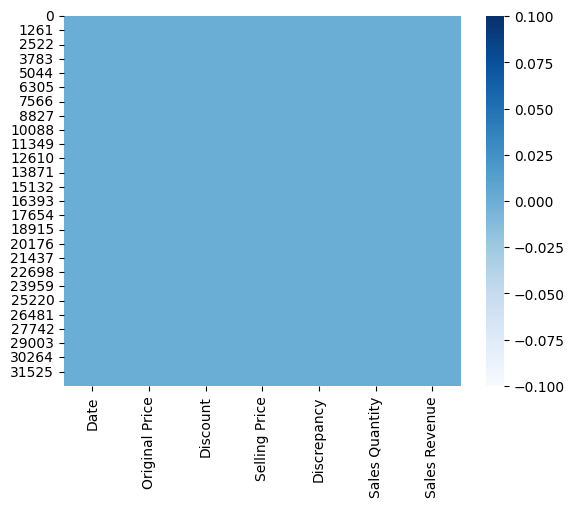

In [10]:
sns.heatmap(df.isna(), cmap="Blues")
df.isna().sum()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32772 entries, 0 to 32771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            32772 non-null  int64  
 1   Original Price  32772 non-null  object 
 2   Discount        32772 non-null  object 
 3   Selling Price   32772 non-null  int64  
 4   Discrepancy     32772 non-null  float64
 5   Sales Quantity  32772 non-null  int64  
 6   Sales Revenue   32772 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 1.8+ MB


In [12]:
df.replace("-", 0, inplace=True)

In [13]:
df["Original Price"] = df["Original Price"].astype(float)
df["Discount"] = df["Discount"].astype(float)

<Axes: >

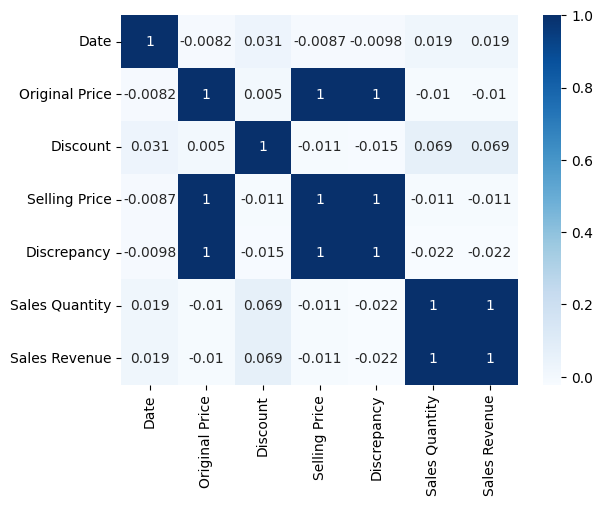

In [14]:
sns.heatmap(df.corr(), annot=True, cmap="Blues")

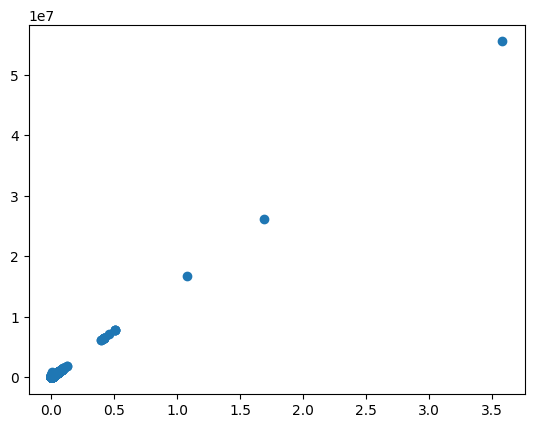

In [15]:
plt.scatter(df["Discrepancy"], df["Original Price"])

In [16]:
# sns.pairplot(df)

In [17]:
df.columns

Index(['Date', 'Original Price', 'Discount', 'Selling Price', 'Discrepancy',
       'Sales Quantity', 'Sales Revenue'],
      dtype='object')

In [18]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [19]:
# x = df["Discrepancy"]
x = np.array(df["Discrepancy"].array).reshape(-1, 1)
y = df["Selling Price"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [20]:
X_train, X_test, y_train, y_test

(array([[0.0206    ],
        [0.01611613],
        [0.01829032],
        ...,
        [0.0156129 ],
        [0.01674194],
        [0.01877419]]),
 array([[0.01825806],
        [0.01428387],
        [0.01986452],
        ...,
        [0.01857419],
        [0.02174194],
        [0.01283871]]),
 12152    319300
 5685     249800
 19721    283500
 6483     356000
 8013     326000
           ...  
 16850    320500
 6265     643000
 11284    242000
 860      259500
 15795    291000
 Name: Selling Price, Length: 29494, dtype: int64,
 3246     283000
 27834    221400
 15541    307900
 10665    251000
 1888     231000
           ...  
 21011    229000
 28433    209300
 25707    287900
 30765    337000
 927      199000
 Name: Selling Price, Length: 3278, dtype: int64)

In [21]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score
model = linear_model.LinearRegression()

model.fit(X_train, y_train)
# model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_train, model.predict(X_train)

(12152    319300
 5685     249800
 19721    283500
 6483     356000
 8013     326000
           ...  
 16850    320500
 6265     643000
 11284    242000
 860      259500
 15795    291000
 Name: Selling Price, Length: 29494, dtype: int64,
 array([321300.87192229, 252045.9304385 , 285627.1035033 , ...,
        244273.43340866, 261711.72802688, 293100.65833968]))

In [23]:
y_pred = model.predict(X_test)

print("training")
print( "mean absolute error " + str(mean_absolute_error(y_test, y_pred)))
print("mean squared error " + str(mean_squared_error(y_test, y_pred)))
print("koefisien determinasi " + str(r2_score(y_test, y_pred)))
print("koefisien " + str(model.coef_))
print("konstanta " + str(model.intercept_))

training
mean absolute error 4301.00915467856
mean squared error 328523452.1649203
koefisien determinasi 0.955634108111139
koefisien [15445346.66185383]
konstanta 3126.7306881039985


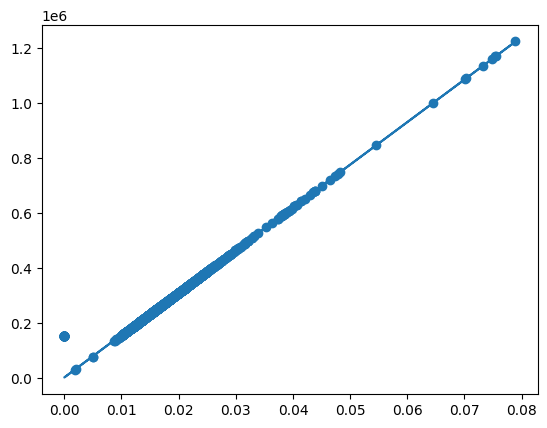

In [24]:
plt.scatter(X_test, y_test)
plt.plot(X_test, model.predict(X_test))

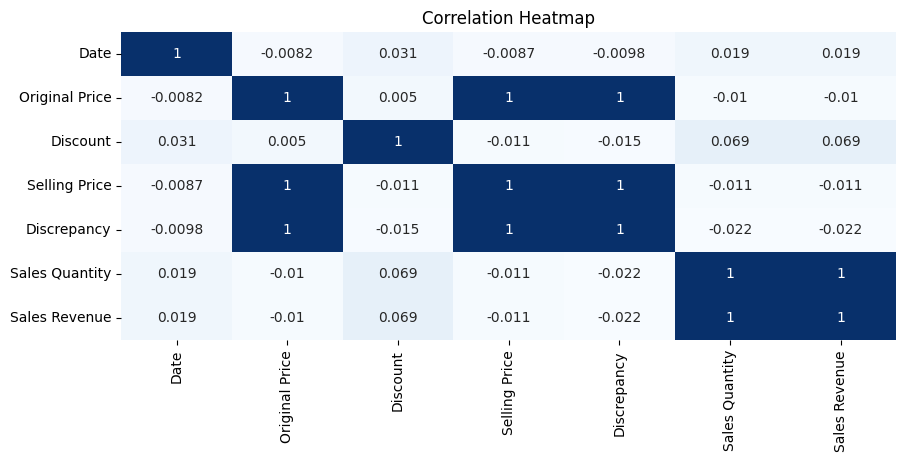

In [133]:
from tkinter import *
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

root = Tk()
root.configure(bg="gray")
root.geometry("860x600")
root.title("Data Processing")

dataFrame = df.to_string(index=False)

fig, ax = plt.subplots()
canvas = FigureCanvasTkAgg(fig, master=root)

text_widget = Text(root, height=20, width=100, state="disabled", wrap="word")

def display_input():
    global dataFrame_b, correlation_b
    dataFrame_b.place(x=80, y=10)
    correlation_b.place(x=260, y=10)

def show_correlation():
    clear_text()
    ax.set_xlim(30)
    ax.set_ylim(30)
    canvas.get_tk_widget().place(x=100, y=50, width=1000, height=400)


    correlation = df.corr()
    ax.clear()
    sns.heatmap(correlation, annot=True, cmap="Blues", ax=ax, cbar=False )
    ax.set_title("Correlation Heatmap")

    canvas.draw()


def show_dataframe():
    ax.clear()
    global text_widget
    text_widget.place(x=100, y=50)

    text_widget.config(state='normal')  
    text_widget.delete(1.0, END)
    text_widget.insert(END, dataFrame)
    text_widget.config(state='disabled')

    canvas.get_tk_widget().place_forget()
    canvas.draw()

def display_process():
    clear_text()
    correlation_b.place_forget()
    dataFrame_b.place_forget()
    ax.clear()
    canvas.get_tk_widget().place(x=100, y=50, width=500, height=400)

    ax.scatter(X_train, y_train)
    y_pred = model.predict(X_train)
    ax.plot(X_train, y_pred, color='red')
    ax.set_title("Scatter Plot with Linear Regression Line")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    coefision = "a: " + str(model.intercept_)
    constanta = "b: " + str(model.coef_)
    ax.text(0.3, 0.9, coefision, transform=ax.transAxes, color='green')
    ax.text(0.3, 0.8, constanta, transform=ax.transAxes, color='green')
    canvas.draw()

def display_output():
    clear_text()
    correlation_b.place_forget()
    dataFrame_b.place_forget()
    ax.clear()
    canvas.get_tk_widget().place(x=100, y=50, width=500, height=400)
    ax.scatter(X_test, y_test)
    y_pred = model.predict(X_test)
    ax.plot(X_test, y_pred, color='red')
    ax.set_title("Scatter Plot with Linear Regression Line")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.text(0.3, 0.9, f"MSE: {mean_squared_error(y_test, y_pred):.2f}", transform=ax.transAxes, color='green')
    ax.text(0.3, 0.8, f"R2: {r2_score(y_test, y_pred):.2f}", transform=ax.transAxes, color='green')
    ax.text(0.3, 0.7, f"MAE: {mean_absolute_error(y_test, y_pred):.2f}", transform=ax.transAxes, color='green')
    canvas.draw()

def clear_text():
    global text_widget
    text_widget.place_forget()




input_b = Button(root, text="Input", command=display_input)
input_b.place(x=10, y=40)

process_b = Button(root, text="Process", command=display_process)
process_b.place(x=10, y=90)

output_b = Button(root, text="Output", command=display_output)
output_b.place(x=10, y=140)

dataFrame_b = Button(root, text="Show Dataframe", command=show_dataframe)
correlation_b = Button(root, text="Show Correlation", command=show_correlation)

root.mainloop()


In [26]:
df

,Date,Original Price,Discount,Selling Price,Discrepancy,Sales Quantity,Sales Revenue
0,33,231000.0,0.0,231000,0.014903,0,0
1,33,218800.0,0.0,218800,0.014116,0,0
2,33,227000.0,0.0,227000,0.014645,0,0
3,33,263000.0,0.0,263000,0.016968,0,0
4,33,236000.0,0.0,236000,0.015226,0,0
...,...,...,...,...,...,...,...
32767,1,244000.0,0.0,244000,0.015742,0,0
32768,1,212000.0,0.0,212000,0.013677,0,0
32769,1,271733.0,0.0,271733,0.017531,0,0
32770,1,210000.0,0.0,210000,0.013548,0,0
